# Linear Regression

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import math

In [108]:

x_train=np.array([1.0,1.5,2.0,2.5,3.0,3.5])
y_train=np.array([400,700,900,1100,1350,1600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1.  1.5 2.  2.5 3.  3.5]
y_train=[ 400  700  900 1100 1350 1600]


In [109]:
# printing the number of training examples here

print(f"x_train shape:{x_train.shape}")
print(f"x_train shape:{x_train.shape[0]}")

# 6 elements in x_train

x_train shape:(6,)
x_train shape:6


In [110]:
i=0
x_i=x_train[i]
y_i=y_train[i]
print(f"{x_i}===={y_i}")

1.0====400


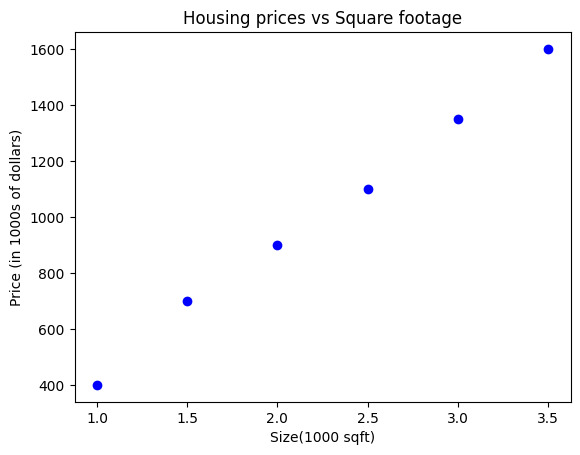

In [111]:
# plotting the points

plt.scatter(x_train,y_train,c='b') #plots  the data points

plt.title("Housing prices vs Square footage") # title of the graph

plt.xlabel("Size(1000 sqft)")

plt.ylabel("Price (in 1000s of dollars)") #setting the labels of X and Y axes

plt.show()


In [112]:
w=400
b=100

def compute_model_output(x,w,b):
    '''computes prediction of the linear model
      Params:
          x=np array of size m
          w , b are the scalars(model parameters)     
          y is the target value
    '''

    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

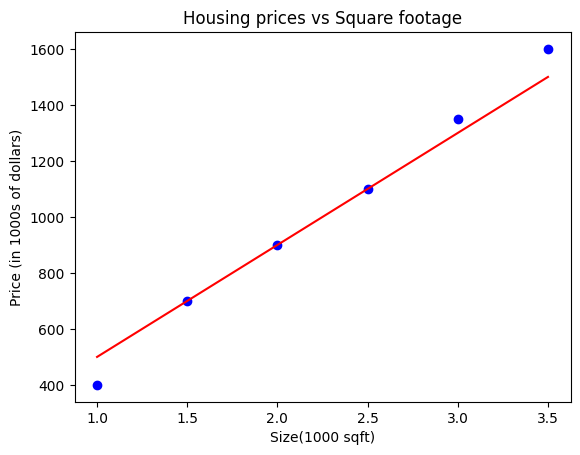

In [113]:
temp_f_wb=compute_model_output(x_train,w,b)

plt.plot(x_train,temp_f_wb,c='r',label="Our Prediction")

plt.scatter(x_train,y_train,c='b',label="Actual values") #plots  the data points

plt.title("Housing prices vs Square footage") # title of the graph

plt.xlabel("Size(1000 sqft)")

plt.ylabel("Price (in 1000s of dollars)") #setting the labels of X and Y axes

plt.show()


In [114]:
#For the prediction 
x_i=1.2
cost=x_i*w+b
print(f"Cost of the 1200 sq ft house is {cost} (in 1000s of dollars)")

Cost of the 1200 sq ft house is 580.0 (in 1000s of dollars)


# Cost function

In [115]:
def compute_cost(x,y,w,b):
    m=x.shape[0]

    cost_sum=0
    for i in range(m):
        f_wb=x[i]*w+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost

    total_cost=(1/(2*m))*cost_sum

    return total_cost

# Gradient Descent

In [116]:
def compute_gradient(x ,y ,w, b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [117]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iter,cost_func,gradient_func):
   '''implements gradient descent by constant updation of w and b values 
      x-ndarray of size m(input params)
      y-ndarray of size m(target values)
      alpa-learning rate
      w_in- initial value of w
      b_in - initial value of b
      num_iter - total iterations
      cost_func - func call to calc the cost
      gradient_func - func call to calc the gradient
      '''
   w=copy.deepcopy(w_in)
   # array to store j and w for plotting later 
   j_history=[]
   p_history=[]
   b=b_in
   w=w_in

   for i in range(num_iter):
      dj_dw,dj_db=gradient_func(x,y,w,b)
      b=b- alpha*dj_db # updation of parameters
      w=w-alpha*dj_dw # updation of parameters

      if i<100000:
         j_history.append(cost_func(x,y,w,b))
         p_history.append([w,b])
      
      # print cost at every 10 intervals or every interval if i<10
      if i% math.ceil(num_iter/10) == 0:
         print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
               f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                                 f"w: {w: 0.3e}, b:{b: 0.5e}")
 
   return w, b, j_history, p_history #return w and J,w history for graphing


In [118]:
# initialize parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, j_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.12e+05  dj_dw: -2.608e+03, dj_db: -1.008e+03   w:  2.608e+01, b: 1.00833e+01
Iteration 1000: Cost 5.32e+02  dj_dw: -2.807e+00, dj_db:  7.089e+00   w:  4.400e+02, b: 2.53749e+01
Iteration 2000: Cost 2.96e+02  dj_dw: -9.421e-01, dj_db:  2.379e+00   w:  4.571e+02, b:-1.77419e+01
Iteration 3000: Cost 2.69e+02  dj_dw: -3.162e-01, dj_db:  7.986e-01   w:  4.628e+02, b:-3.22131e+01
Iteration 4000: Cost 2.66e+02  dj_dw: -1.061e-01, dj_db:  2.680e-01   w:  4.647e+02, b:-3.70701e+01
Iteration 5000: Cost 2.66e+02  dj_dw: -3.562e-02, dj_db:  8.996e-02   w:  4.654e+02, b:-3.87003e+01
Iteration 6000: Cost 2.66e+02  dj_dw: -1.195e-02, dj_db:  3.019e-02   w:  4.656e+02, b:-3.92474e+01
Iteration 7000: Cost 2.66e+02  dj_dw: -4.012e-03, dj_db:  1.013e-02   w:  4.657e+02, b:-3.94310e+01
Iteration 8000: Cost 2.66e+02  dj_dw: -1.347e-03, dj_db:  3.401e-03   w:  4.657e+02, b:-3.94927e+01
Iteration 9000: Cost 2.66e+02  dj_dw: -4.520e-04, dj_db:  1.142e-03   w:  4.657e+02, b:-3.95134e+01


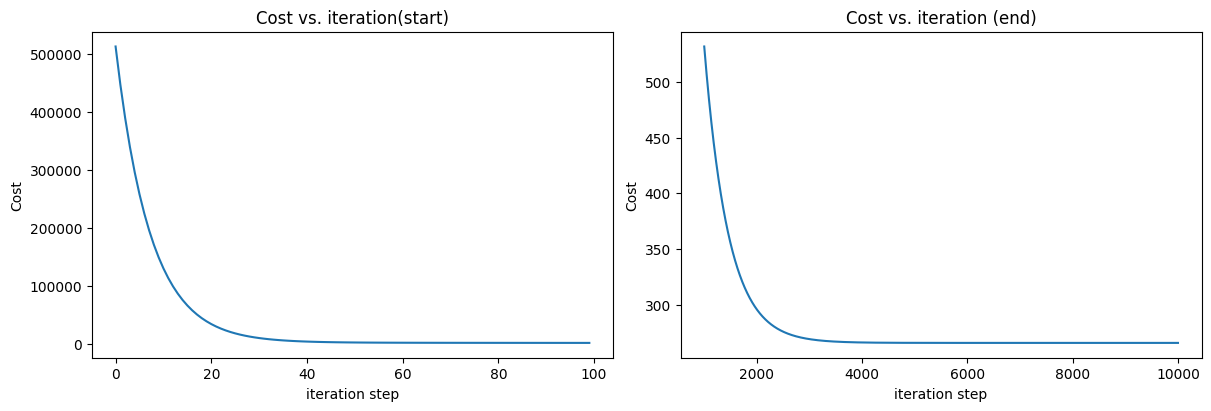

In [119]:
# Plotting the cost vs iteration graph to get a clearer idea
fig, (ax1,ax2)=plt.subplots(1,2 , constrained_layout=True,figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000+np.arange(len(j_hist[1000:])),j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
#prediction

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2400 sqft house prediction {w_final*2.4 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 426.2 Thousand dollars
1200 sqft house prediction 519.3 Thousand dollars
2400 sqft house prediction 1078.2 Thousand dollars
